# Pytorch Tutorial

## 0. Quickstart

In [14]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
  root="data",
  train =True,
  download = True,
  transform=ToTensor(),
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader :
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break


Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


## 1. Tensor

---


In [15]:
import torch
import numpy as np

### 1-1. Initializing a Tensor

* Directly from data

In [16]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

* From a NumPy array

In [17]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

* From another tensor

In [18]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8309, 0.7680],
        [0.1116, 0.6316]]) 



* With random or constant values

In [19]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5522, 0.1647, 0.8801],
        [0.9496, 0.5191, 0.3154]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 1-2. Attributes(속성) of a Tensor

텐서의 속성은  
    
        shape(모양)
        dtype(datatype, 자료형)
        device(저장되는 장치)

  이 존재한다.

In [20]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 1-3. Operations on Tensors

* **텐서의 이동**
  
  텐서는 `to` 메서드를 이용해 CPU에서 GPU로 이동이 가능하다.

In [21]:
# if torch.cuda.is_available():
#   tensor = tensor.to("cuda")

# 맥북이라면

if torch.backends.mps.is_available():
  tensor = tensor.to("mps")

* **NumPy식 표준 인덱싱과 슬라이싱**

In [25]:
tensor = torch.ones(4,4)
print(f"First row: {tensor[0]}")
print(f"First Column: {tensor[:,0]}")
print(f"Last Column: {tensor[...,-1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First Column: tensor([1., 1., 1., 1.])
Last Column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


* **텐서 합치기**

In [32]:
t1 = torch.cat([tensor, tensor, tensor], dim = 0) # dim = 0 means concatenate tensor along column dim
print(t1.shape)

t2 = torch.cat([tensor, tensor, tensor], dim = 1)
print(t2.shape)

t3 = torch.stack([tensor, tensor, tensor], dim = 0) # torch.stack: concatenate with new dim
print(t3.shape)

t4 = torch.stack([tensor, tensor, tensor], dim=1)
print(t4.shape)

torch.Size([12, 4])
torch.Size([4, 12])
torch.Size([3, 4, 4])
torch.Size([4, 3, 4])


* **산술 연산**

In [37]:
# matrix multiplication
# y1, y2, y3 will have the same value
y1 = tensor @ tensor.T 
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

# element-wise product
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

* **단일-요소(single-element) 텐서**  

  텐서의 모든 값을 집계(aggregate)하여 요소가 하나인 텐서는 `item()` 메서드를 사용해 Python 숫자 값으로 변환 가능하다.

In [38]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


### 1-4. Bridge with NumPy

CPU상의 텐서와 NumPy배열은 **메모리 공간을 공유**하기 떄문에, 하나를 변경하면 다른 하나도 변경된다.

* **Tensor to NumPy array**

In [46]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [47]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

np.add(n,1,out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]
t: tensor([3., 3., 3., 3., 3.])
n: [3. 3. 3. 3. 3.]


* **NumPy array to Tensor**

In [48]:
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n,1,out=n)
print(f"n: {n}")
print(f"t: {t}")

n: [2. 2. 2. 2. 2.]
t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## 2. Datasets & DataLoaders

---

더 나은 가독성(Readability)와 모듈성(modularity)을 위해, 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적이다.  
이를 위해 pytorch에서는 2가지 데이터 기본 요소를 제공한다. 


`torch.utils.data.Dataset` : 샘플과 정답(label)을 저장  

`torch.utils.data.DataLoader` : `dataset`을 `iterable`(순회 가능한 객체)로 감싸는 역할  

### 2-1. Loading a Dataset

`Fashion-MNIST` 데이터셋을 불러온다. 각 예제는 28x28 Grayscale Image와 10 Class중 하나인 Label로 구성된다.  

다음 매개변수들을 사용하여 `FashionMNIST` 데이터셋을 불러온다.  

* `root`: 학습/테스트 데이터가 저장되는 경로
* `train`: 학습용/테스트용 데이터셋 여부 지정
* `download=True`: `root`에 데이터가 없는 경우 다운로드
* `transform` `target_transform`: 특징(feature)과 정답(label) 변형(transform)을 지정

In [49]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
  root="data",
  train=True,
  download=True,
  transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

### 2-2. Iterating and Visualizing the Dataset

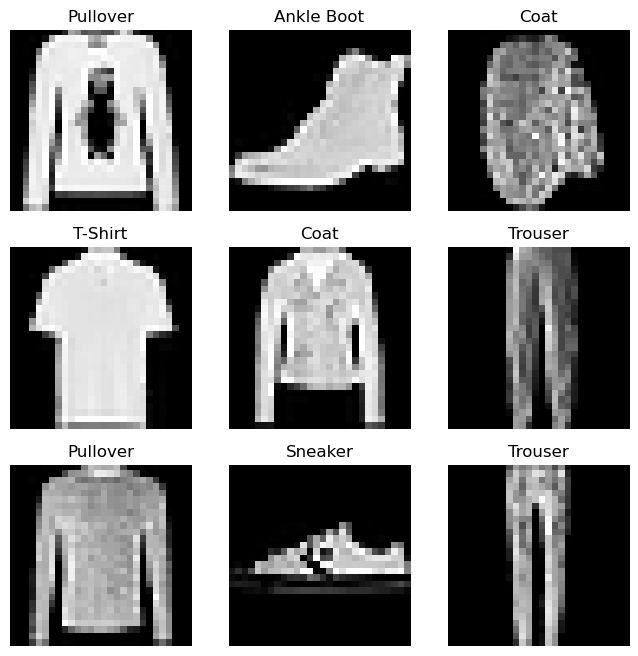

In [51]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 2-3. Creating a Custom Dataset for your files

사용자 정의 Dataset 클래스는 반드시 3개의 함수를 구현해야 한다.  

* `__init__`
* `__len__`
* `__getitem__`

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names = ['file_name', 'label'])